In [21]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from numpy.linalg import inv
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score


<div class="alert alert-block alert-success">

### Basic Exploration

In [116]:
df_nas = pd.read_excel('Training Data.xlsx')

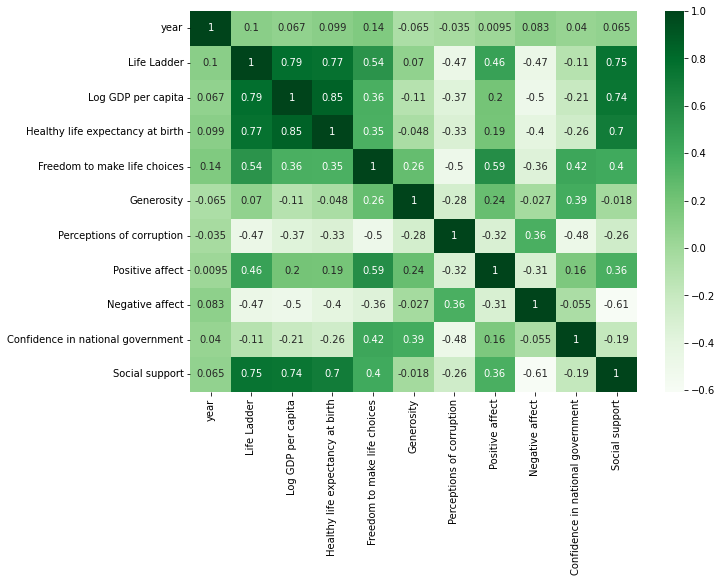

In [11]:
df = df_nas.dropna() ### Hopefully won't be needed if Matthew's idea works but we can keep it in anyway

plt.figure(figsize=(10, 7))

dataplot = sb.heatmap(df.corr(), cmap="Greens", annot=True)

plt.show()

<div class="alert alert-block alert-success">

### Convert data into right shape

In [126]:
# Take out the columns we need 

X_train_pre = df[['Log GDP per capita','Healthy life expectancy at birth', 'Freedom to make life choices',
              'Generosity', 'Perceptions of corruption', 'Life Ladder', 'Positive affect','Negative affect',
             'Confidence in national government']]

y_train_pre = df[['Social support']]


In [127]:
X_train= X_train_pre.to_numpy()
X_train.shape

(720, 9)

In [128]:
y_train= y_train_pre.to_numpy()
y_train.shape

(720, 1)

<div class="alert alert-block alert-success">

### Find the best coefficients and predict 

In [129]:
def find_optz_w(A,y): 
    
    ''' 
    A: Takes a matrix with our predictors 
    y: Takes in a vector with our traning target variables
    '''
    
    (n, predictors) = A.shape 
    p = predictors + 1
    
    new_A = np.ones(shape=(n,p)) # Will leave our first column with 1s for when we multiply by the first coefficients 
    new_A[:,1:]=A
                
    w = np.linalg.inv(new_A.T @ new_A) @ new_A.T @ y #minimizes_mean_squared_error from homework 1 
    return w


In [130]:
optz_w = find_optz_w(X_train,y_train)
optz_w

array([[ 0.18521929],
       [ 0.02353781],
       [ 0.00256426],
       [-0.00395562],
       [ 0.0122431 ],
       [ 0.1144781 ],
       [ 0.0403437 ],
       [ 0.1018497 ],
       [-0.42893811],
       [-0.00947399]])

In [19]:
def get_targets(optz_w, A):
    
    '''
    optz_w: Takes in our array of optz_w (our coefficients) 
    A: Takes a matrix with our predictors 
    '''
    
    (n, predictors) = A.shape # P is the number of predictors we have 
    p = predictors + 1
    
    new_A = np.ones(shape=(n,p)) # Will leave our first column with 1s for when we multiply by the first coefficients 
    new_A[:,1:]=A
        
    targets = np.dot(new_A, optz_w)
    
    return targets


In [137]:

# We convert our optimized w's into a numpy array. This is our model 
model = np.array(optz_w) 


In [138]:
# Run the model on our training data
predicted_target = get_targets(model, X_train)

# Output  mse:
mse = mean_squared_error(y_train,predicted_target) 
print("mse:", mse)

mse: 0.004247051562830176


<font color='red'>IMPORTANT NOTE:</font> I just used a function to calculate mse here so that you can make a function for it


<div class="alert alert-block alert-success">

### Find optz_w using a function

In [50]:
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

X_train = sm.add_constant(X_train) 

print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

mse = mean_squared_error(y_train,predictions) 
print(" ")
print("mse:", mse)

Intercept: [0.18521929]
Coefficients: [[ 0.          0.02353781  0.00256426 -0.00395562  0.0122431   0.1144781
   0.0403437   0.1018497  -0.42893811 -0.00947399]]
 
mse: 0.004247051562830176


<div class="alert alert-block alert-success">

### Compare "scratch" function vs the official function on the training data set

In [94]:
# First convert to the right data type and shape 

scratch_coeff = optz_w.reshape(10,)
print(scratch_coeff.shape)

func_coeff = (regr.coef_.T).reshape(10,)
print(func_coeff.shape)

(10,)
(10,)


In [91]:
optz_w.shape

(10, 1)

In [106]:
arr_coeff = np.array([scratch_coeff,func_coeff])

names_coeff = ["Scratch coefficients", "Function coefficients"]

compare_coef = pd.DataFrame(arr_coeff, names_coeff)
compare_coef

,0,1,2,3,4,5,6,7,8,9
Scratch coefficients,0.185219,0.023538,0.002564,-0.003956,0.012243,0.114478,0.040344,0.10185,-0.428938,-0.009474
Function coefficients,0.000000,0.023538,0.002564,-0.003956,0.012243,0.114478,0.040344,0.10185,-0.428938,-0.009474


In [109]:
arr_mse = np.array([0.004247051562830176,0.004247051562830176])
names_mse = ["Scratch", "Function"]

compare_mse = pd.DataFrame(arr_mse, names_mse, columns=["mse"])
compare_mse

,mse
Scratch,0.004247
Function,0.004247


<div class="alert alert-block alert-success">

### Use our "scratch" function on the testing data set

In [118]:
df_test_nas = pd.read_excel('Testing Data 2021.xlsx')

df_test = df_test_nas.dropna() 

len(df_test)

100

In [120]:
X_test_pre = df_test[['Log GDP per capita','Healthy life expectancy at birth', 'Freedom to make life choices',
              'Generosity', 'Perceptions of corruption', 'Life Ladder', 'Positive affect','Negative affect',
             'Confidence in national government']]

y_test_pre = df_test[['Social support']]

In [132]:
X_test= X_test_pre.to_numpy()
X_test.shape

(100, 9)

In [133]:
y_test= y_test_pre.to_numpy()
y_test.shape

(100, 1)

Note to self: Don't send to find_opz_w, use the optimized model we previously found

In [140]:
# Run the model on our testing data
predicted_target_test = get_targets(model, X_test)

In [141]:
mse_test = mean_squared_error(y_test,predicted_target_test) 
print("mse:", mse_test)

mse: 0.0029650796848547235


<div class="alert alert-block alert-success">

Very close to our training data set! 